<a href="https://colab.research.google.com/github/ThakurUjjawal7/data-science-projects/blob/main/USA_house_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt






In [ ]:
df = pd.read_csv("/content/usa_housing_kaggle.csv")

In [ ]:
df.head()


,Price,Bedrooms,Bathrooms,SquareFeet,YearBuilt,GarageSpaces,LotSize,ZipCode,CrimeRate,SchoolRating
0,221958,1,1.9,4827,1979,2,1.45,82240,48.60,5
1,771155,2,2.0,1035,1987,2,1.75,74315,92.03,9
2,231932,1,3.0,2769,1982,1,1.46,79249,52.08,3
3,465838,3,3.3,2708,1907,3,1.62,80587,61.65,1
4,359178,4,3.4,1175,1994,2,0.74,20756,15.66,4


In [ ]:
df.describe()

,Price,Bedrooms,Bathrooms,SquareFeet,YearBuilt,GarageSpaces,LotSize,ZipCode,CrimeRate,SchoolRating
count,300.000000,300.000000,300.000000,300.00000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,522761.916667,2.966667,2.464000,3052.75000,1962.616667,1.513333,1.062200,54324.770000,49.324033,5.096667
std,256922.348275,1.451175,0.886184,1194.97144,36.005431,1.116832,0.543896,24718.938552,28.833220,2.674165
min,112666.000000,1.000000,1.000000,840.00000,1902.000000,0.000000,0.110000,10163.000000,0.190000,1.000000
25%,299936.500000,2.000000,1.700000,2053.50000,1931.750000,1.000000,0.570000,34175.000000,22.547500,3.000000
50%,505806.500000,3.000000,2.400000,3127.00000,1961.000000,1.000000,1.085000,54896.500000,49.970000,5.000000
75%,744603.750000,4.000000,3.200000,4081.00000,1994.000000,3.000000,1.482500,74108.000000,74.402500,8.000000
max,999684.000000,5.000000,4.000000,4997.00000,2022.000000,3.000000,2.000000,99881.000000,99.710000,9.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Price         300 non-null    int64  
 1   Bedrooms      300 non-null    int64  
 2   Bathrooms     300 non-null    float64
 3   SquareFeet    300 non-null    int64  
 4   YearBuilt     300 non-null    int64  
 5   GarageSpaces  300 non-null    int64  
 6   LotSize       300 non-null    float64
 7   ZipCode       300 non-null    int64  
 8   CrimeRate     300 non-null    float64
 9   SchoolRating  300 non-null    int64  
dtypes: float64(3), int64(7)
memory usage: 23.6 KB


In [ ]:
df.isnull().sum()

,0
Price,0
Bedrooms,0
Bathrooms,0
SquareFeet,0
YearBuilt,0
GarageSpaces,0
LotSize,0
ZipCode,0
CrimeRate,0
SchoolRating,0


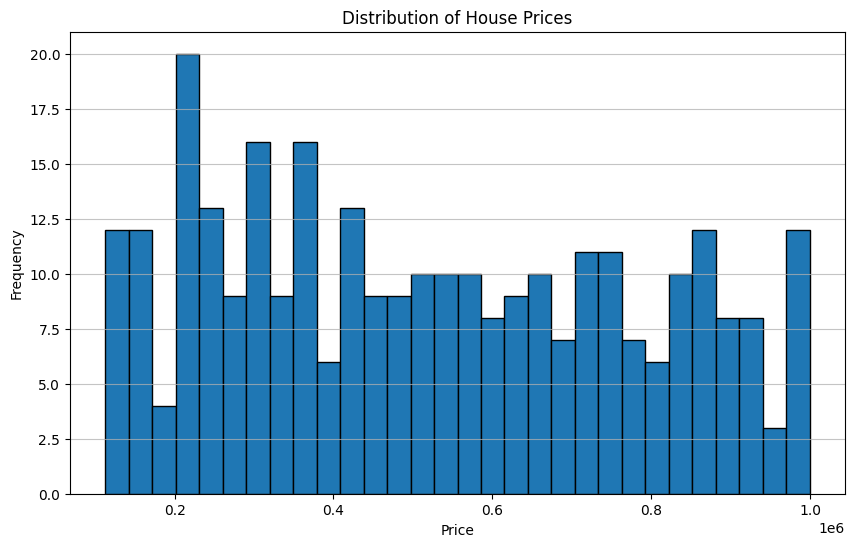

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df['Price'], bins=30, edgecolor='black')
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [ ]:
numerical_features = ['Bedrooms', 'Bathrooms', 'SquareFeet', 'YearBuilt', 'GarageSpaces', 'LotSize', 'CrimeRate', 'SchoolRating']
df[numerical_features].describe()

,Bedrooms,Bathrooms,SquareFeet,YearBuilt,GarageSpaces,LotSize,CrimeRate,SchoolRating
count,300.000000,300.000000,300.00000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,2.966667,2.464000,3052.75000,1962.616667,1.513333,1.062200,49.324033,5.096667
std,1.451175,0.886184,1194.97144,36.005431,1.116832,0.543896,28.833220,2.674165
min,1.000000,1.000000,840.00000,1902.000000,0.000000,0.110000,0.190000,1.000000
25%,2.000000,1.700000,2053.50000,1931.750000,1.000000,0.570000,22.547500,3.000000
50%,3.000000,2.400000,3127.00000,1961.000000,1.000000,1.085000,49.970000,5.000000
75%,4.000000,3.200000,4081.00000,1994.000000,3.000000,1.482500,74.402500,8.000000
max,5.000000,4.000000,4997.00000,2022.000000,3.000000,2.000000,99.710000,9.000000


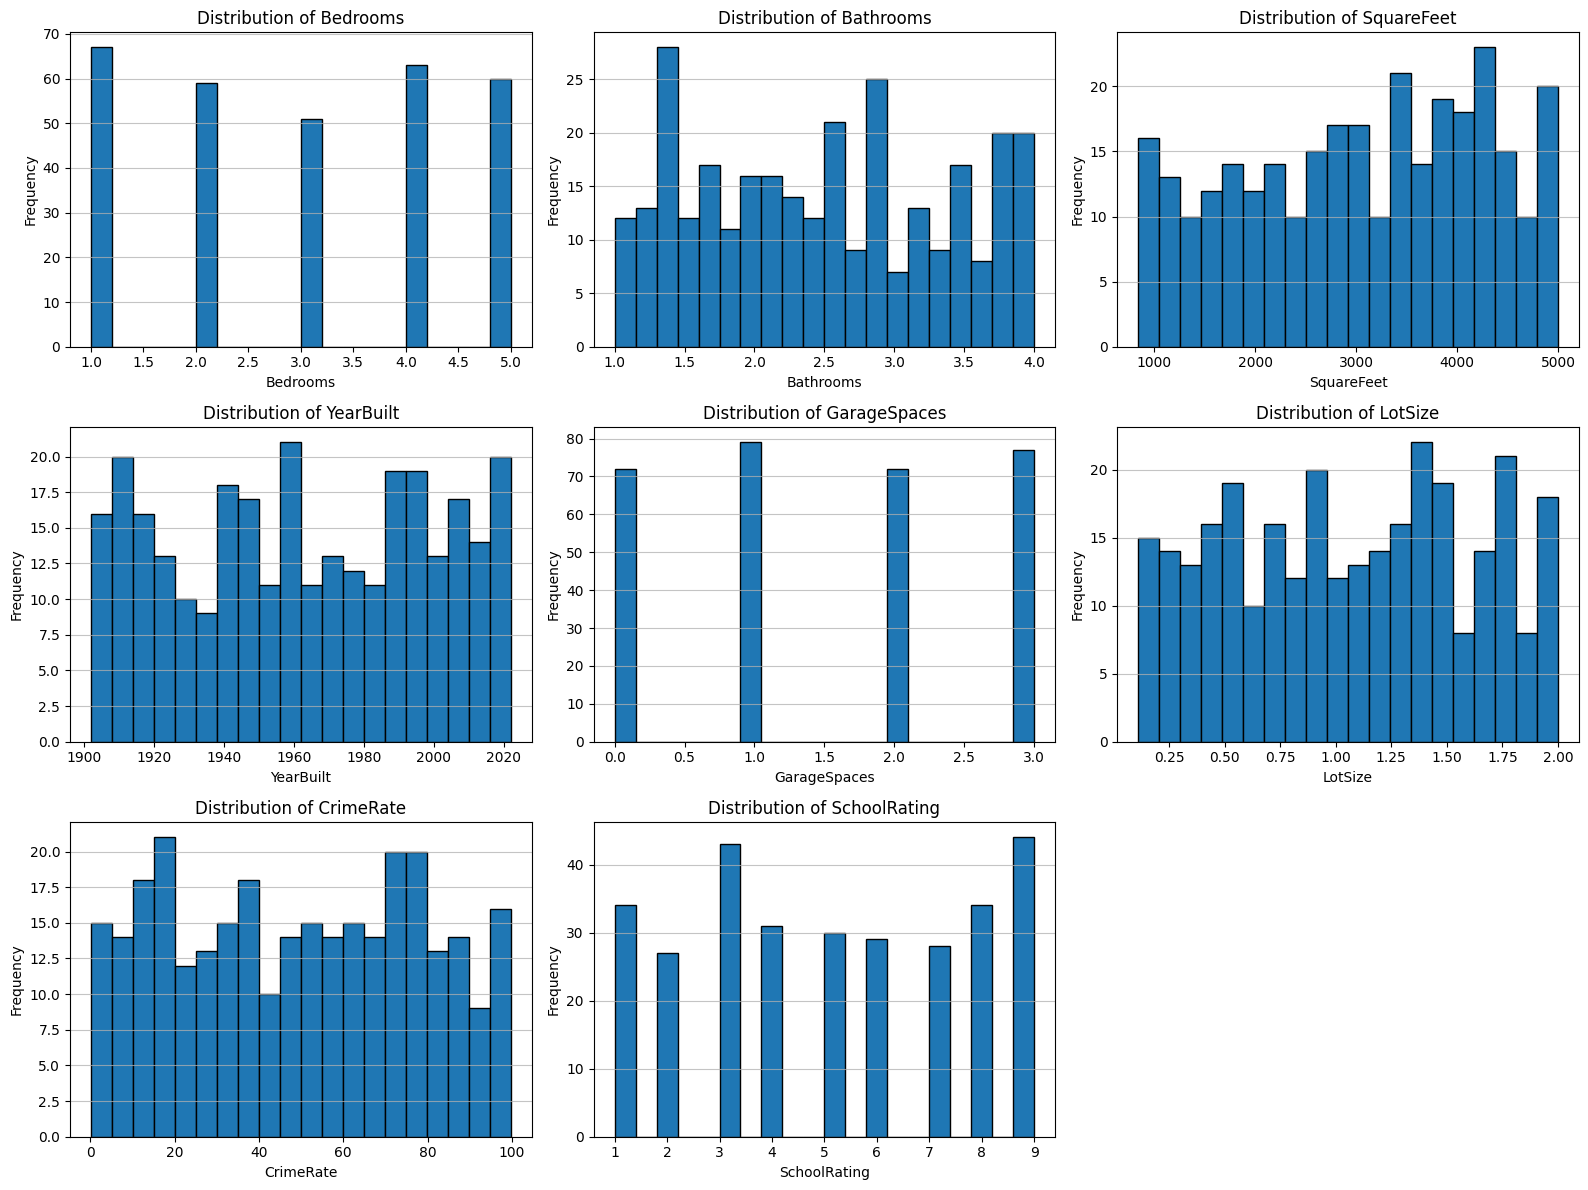

In [ ]:
import math

plt.figure(figsize=(16, 12))
num_features = len(numerical_features)
cols = 3  # Number of columns for subplots
rows = math.ceil(num_features / cols)

for i, feature in enumerate(numerical_features):
    plt.subplot(rows, cols, i + 1)
    plt.hist(df[feature], bins=20, edgecolor='black')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.grid(axis='y', alpha=0.75)

plt.tight_layout()
plt.show()


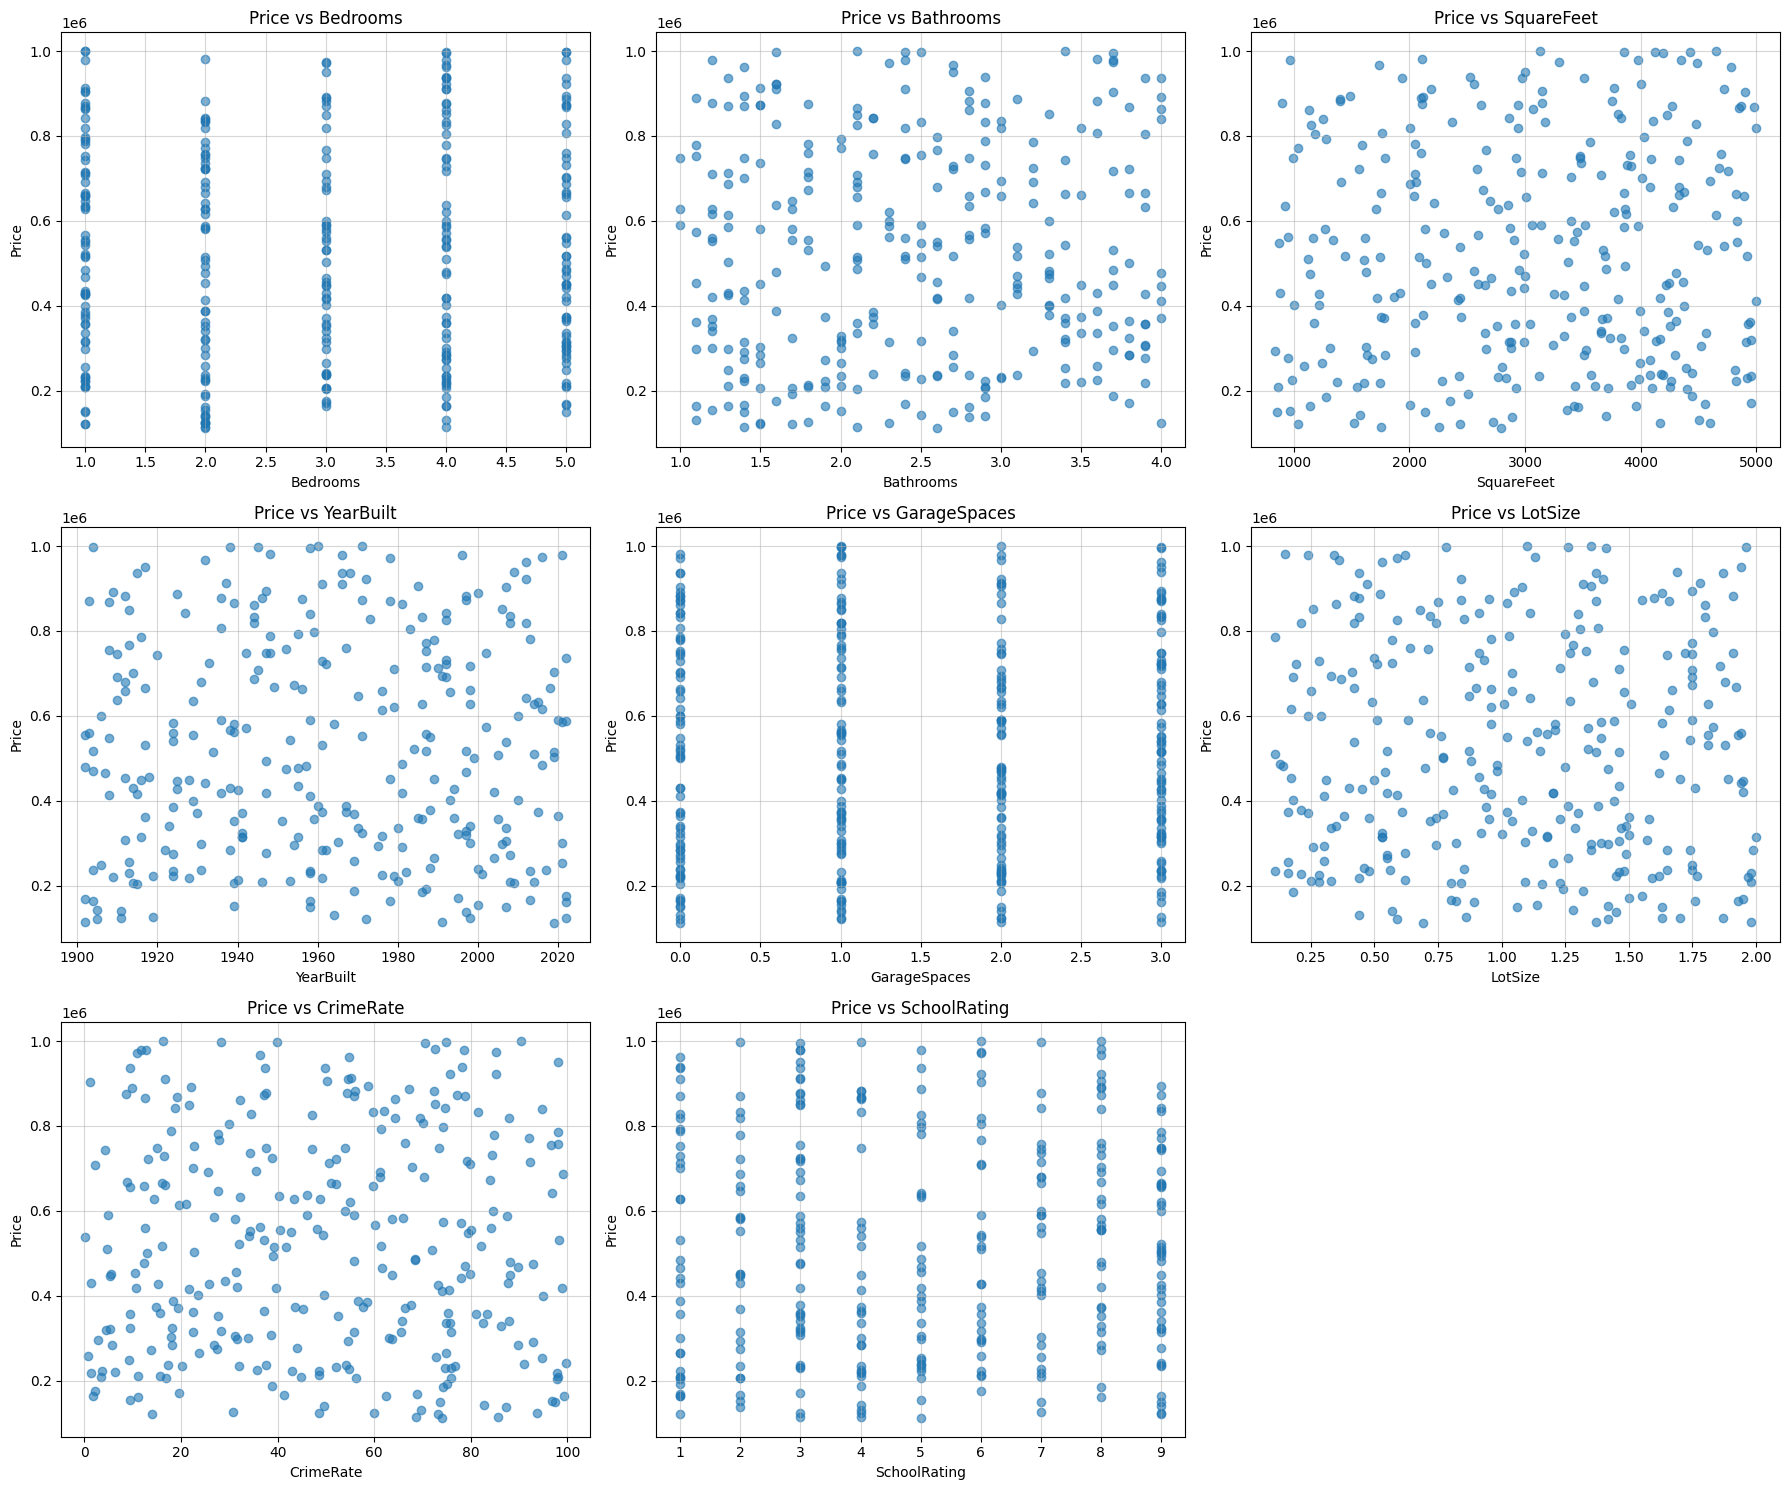

In [ ]:
plt.figure(figsize=(18, 15))
num_features = len(numerical_features)
cols = 3
rows = math.ceil(num_features / cols)

for i, feature in enumerate(numerical_features):
    plt.subplot(rows, cols, i + 1)
    plt.scatter(df[feature], df['Price'], alpha=0.6)
    plt.title(f'Price vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.grid(True, alpha=0.5)

plt.tight_layout()
plt.show()

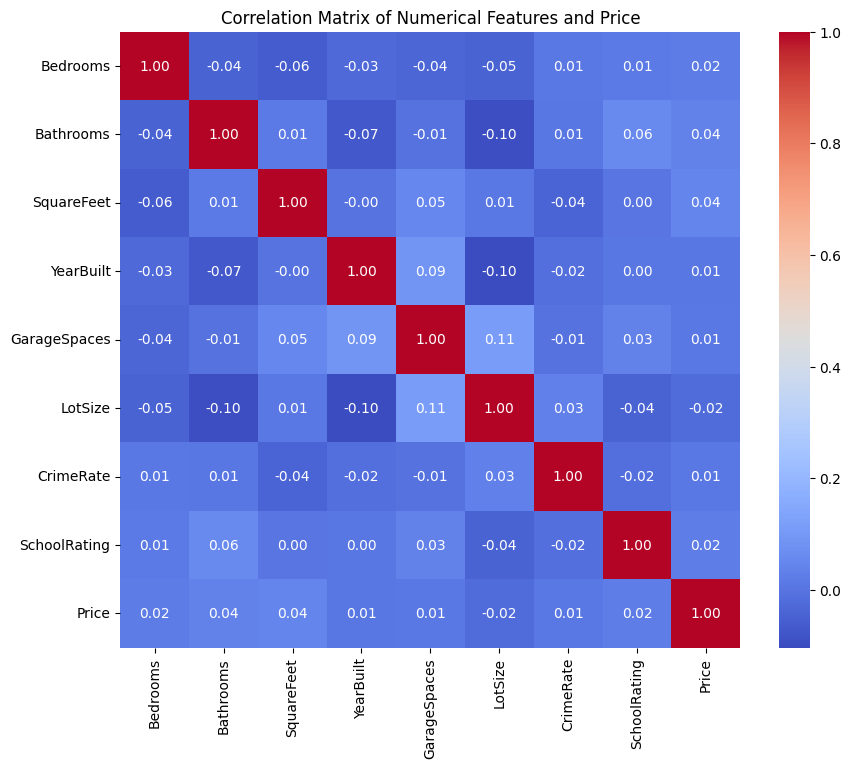

In [ ]:
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_features + ['Price']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features and Price')
plt.show()

In [ ]:
X = df[['Bedrooms', 'Bathrooms','SquareFeet','YearBuilt','GarageSpaces','LotSize','ZipCode','CrimeRate','SchoolRating']]
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = LinearRegression()
model.fit(X_train, y_train)

pred = model.predict(X_test)
print("MSE:", mean_squared_error(y_test, pred))

MSE: 77279639974.86401


In [ ]:
from sklearn import svm

In [ ]:
model2 = svm.SVR()
model2.fit(X_train, y_train)

pred = model2.predict(X_test)
print("MSE:", mean_squared_error(y_test, pred))

MSE: 69438182557.92374


In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
model3 = RandomForestRegressor()
model3.fit(X_train, y_train)

pred = model3.predict(X_test)
print("MSE:", mean_squared_error(y_test, pred))

MSE: 76959501616.19455


In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
model4 = DecisionTreeRegressor()
model4.fit(X_train, y_train)

pred = model4.predict(X_test)
print("MSE:", mean_squared_error(y_test, pred))

MSE: 153361563008.7


In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
model5 = KNeighborsRegressor()
model5.fit(X_train, y_train)

pred = model5.predict(X_test)
print("MSE:", mean_squared_error(y_test, pred))

MSE: 63632400591.30532
